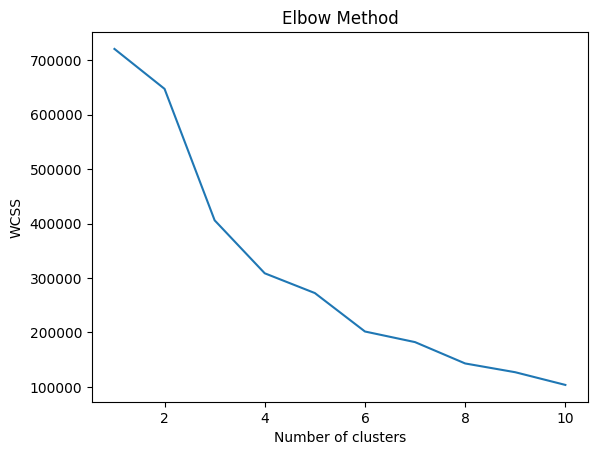

Cluster
1    61501
0     4030
2        1
Name: count, dtype: int64


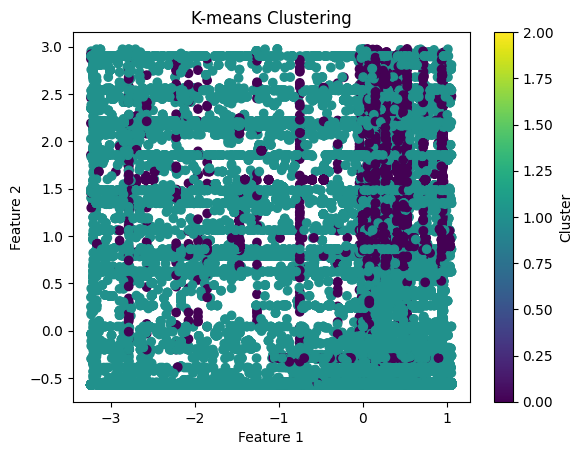

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('log2.csv')

# Select relevant features for clustering
features = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port',
            'Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)',
            'pkts_sent', 'pkts_received']

X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the Elbow Method, select the optimal number of clusters (where the decrease in WCSS starts to slow down)
n_clusters = 3  # Adjust as per the Elbow Method graph

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
data['Cluster'] = clusters

# Print the number of data points in each cluster
print(data['Cluster'].value_counts())

# Visualize the clusters (plotting only two dimensions for simplicity)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()


Classification Report:
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7545
        deny       1.00      1.00      1.00      2994
        drop       1.00      1.00      1.00      2562
  reset-both       0.71      0.83      0.77         6

    accuracy                           1.00     13107
   macro avg       0.93      0.96      0.94     13107
weighted avg       1.00      1.00      1.00     13107

Confusion Matrix:
[[7543    2    0    0]
 [   0 2985    7    2]
 [   0    9 2553    0]
 [   0    1    0    5]]


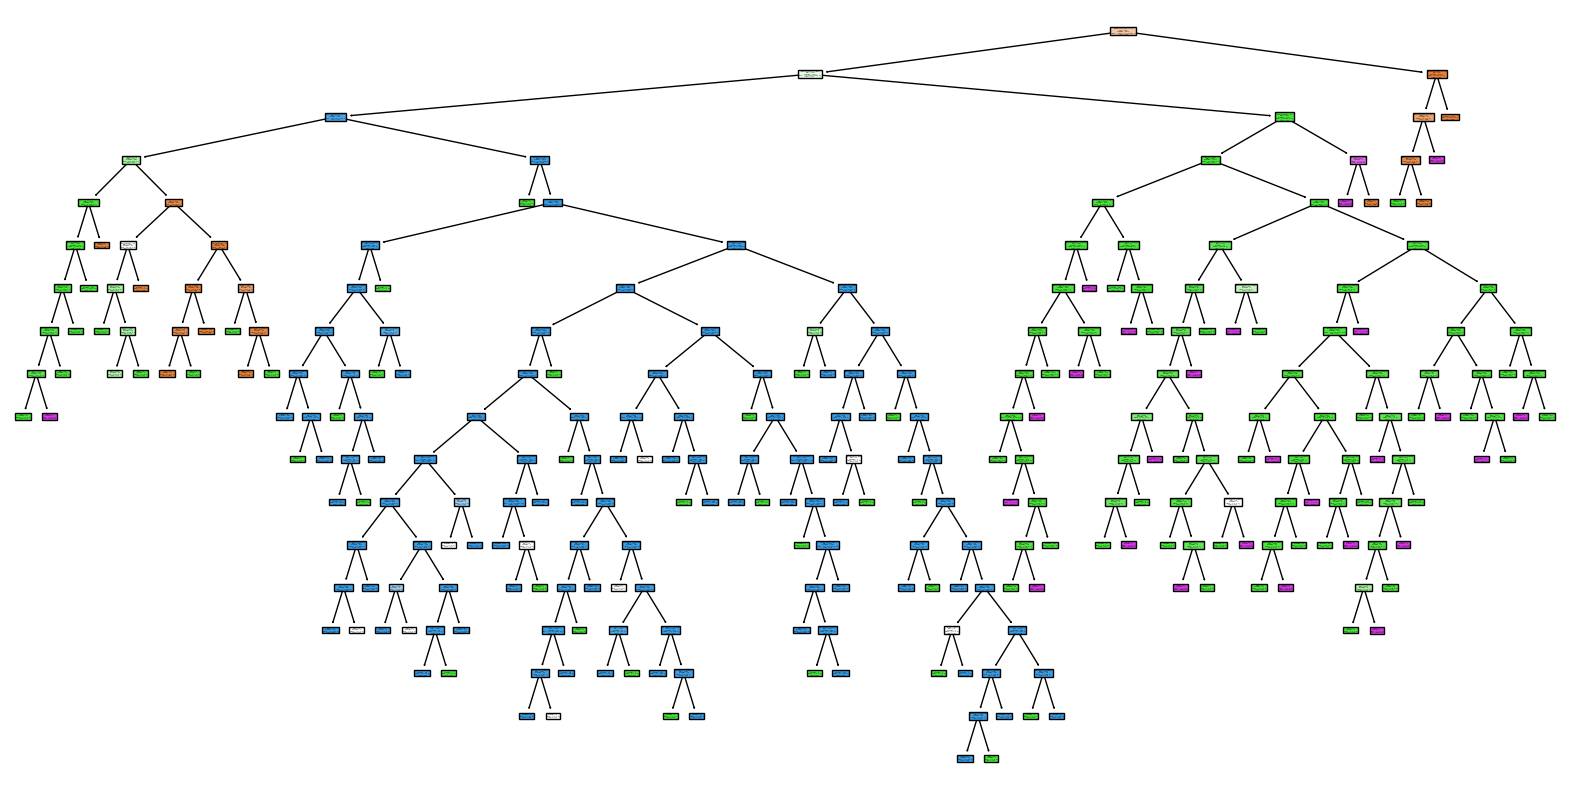

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# Load the dataset
data = pd.read_csv("log2.csv")

# Select relevant features and target variable
features = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port',
            'Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)',
            'pkts_sent', 'pkts_received']

X = data[features]
y = data['Action']  # Assuming 'Action' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree (optional)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=features, class_names=clf.classes_)
plt.show()
